In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib created a temporary config/cache directory at /var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/matplotlib-bndv4afw because the default path (/Users/joban/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
stats = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [3]:
df = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', header = 0)

In [4]:
df.head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
5,228,1996-97,62.0,27.0,15.4,1.3,2.6,0.513,0.0,0.0,...,1.1,1.7,0.689,1.2,2.3,0.5,0.7,0.5,0.2,3.8
6,154,1996-97,45.0,30.0,13.1,0.9,2.0,0.435,0.0,0.0,...,0.5,1.1,0.420,1.3,2.4,0.3,0.6,0.4,0.2,2.2
7,673,1996-97,30.0,24.0,17.2,2.6,5.4,0.475,0.0,0.0,...,1.5,2.5,0.600,1.6,2.3,0.8,1.0,0.7,0.2,6.6
8,1059,1996-97,8.0,29.0,7.9,1.0,2.0,0.500,0.6,0.9,...,0.5,0.6,0.800,0.1,0.5,0.6,0.6,0.0,0.0,3.1
9,275,1996-97,81.0,26.0,34.3,5.4,12.7,0.423,1.8,4.7,...,2.2,2.7,0.803,0.5,2.4,2.2,2.1,0.5,0.2,14.8


In [5]:
df.tail(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10623,201163,2018-19,51.0,31.0,23.1,2.2,5.4,0.418,1.2,3.1,...,0.4,0.5,0.720,0.9,3.3,1.6,0.9,0.5,0.4,6.0
10624,1628999,2018-19,2.0,22.0,6.5,0.5,2.0,0.250,0.0,0.5,...,0.0,0.0,0.000,0.5,1.0,0.0,0.0,0.5,0.0,1.0
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7
10629,1629155,2018-19,1.0,26.0,3.8,0.0,1.0,0.000,0.0,1.0,...,0.0,0.0,0.000,0.0,0.0,0.0,1.0,1.0,0.0,0.0
10630,2585,2018-19,68.0,35.0,12.9,1.3,2.8,0.440,0.0,0.1,...,1.4,1.8,0.782,1.5,2.4,1.3,0.8,0.5,0.3,3.9
10631,1629015,2018-19,6.0,19.0,18.4,2.3,5.7,0.412,1.0,2.7,...,1.0,1.3,0.750,0.5,1.7,1.7,1.0,0.3,0.3,6.7
10632,1627753,2018-19,1.0,23.0,1.0,1.0,1.0,1.000,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
df.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
7815,200755,2013-14,35.0,30.0,28.2,5.2,11.4,0.455,2.1,5.3,...,2.8,3.0,0.915,0.3,1.9,2.2,1.2,0.8,0.1,15.2
2044,1074,2000-01,55.0,29.0,25.5,2.7,6.3,0.420,0.9,2.6,...,0.5,0.6,0.765,0.3,1.9,2.8,1.3,1.0,0.1,6.7
4610,1521,2006-07,64.0,32.0,11.9,1.1,2.6,0.425,0.0,0.0,...,0.8,1.0,0.754,0.1,0.9,2.0,0.6,0.4,0.0,3.0
1143,84,1998-99,37.0,28.0,33.4,5.8,14.0,0.415,0.6,2.1,...,4.2,5.2,0.812,1.1,3.1,2.5,2.1,1.2,0.1,16.4
3805,2058,2004-05,41.0,29.0,14.7,0.8,1.6,0.515,0.0,0.0,...,0.5,1.0,0.500,1.5,1.6,0.4,0.6,0.2,0.3,2.1
10499,201956,2018-19,36.0,30.0,14.5,2.4,4.5,0.534,0.4,1.2,...,1.1,1.6,0.672,0.5,2.7,0.7,0.6,0.6,0.3,6.3
5107,2038,2007-08,77.0,28.0,23.6,1.9,3.2,0.576,0.0,0.0,...,1.1,1.6,0.680,2.5,5.9,0.4,1.2,0.2,1.2,4.8
5989,201145,2009-10,82.0,23.0,37.1,5.9,13.0,0.453,1.3,3.8,...,2.0,2.7,0.740,1.4,4.6,1.6,1.6,1.3,0.9,15.1
1376,1510,1999-00,65.0,24.0,27.1,3.5,8.6,0.412,0.0,0.2,...,2.2,2.8,0.761,0.6,2.4,7.0,2.4,1.6,0.3,9.3
7012,201578,2011-12,60.0,24.0,22.4,3.7,8.1,0.453,0.0,0.1,...,1.4,1.8,0.771,2.2,4.0,0.8,1.2,0.4,0.5,8.8


In [7]:
list(df)

['player_id',
 'season_id',
 'gp',
 'age',
 'min',
 'fgm',
 'fga',
 'fg_pct',
 'fg3m',
 'fg3a',
 'fg3_pct',
 'ftm',
 'fta',
 'ft_pct',
 'oreb',
 'dreb',
 'ast',
 'tov',
 'stl',
 'blk',
 'pts']

In [8]:
# drop rows with all missing vals to clean data

In [9]:
df_cleaned = df.dropna(how="all")

In [10]:
df_cleaned['gp'].describe()

count    10633.000000
mean        52.633782
std         25.115265
min          1.000000
25%         33.000000
50%         59.000000
75%         75.000000
max         85.000000
Name: gp, dtype: float64

In [11]:
# drop outliers by dropping 3 sds away on the low end in terms of games played

In [12]:
min_gp = df_cleaned['gp'].mean() - (df_cleaned['gp'].std()*3)

In [13]:
min_gp

-22.712012335693153

In [14]:
# this number is too low, lets look at a graph to find a better min

<AxesSubplot:>

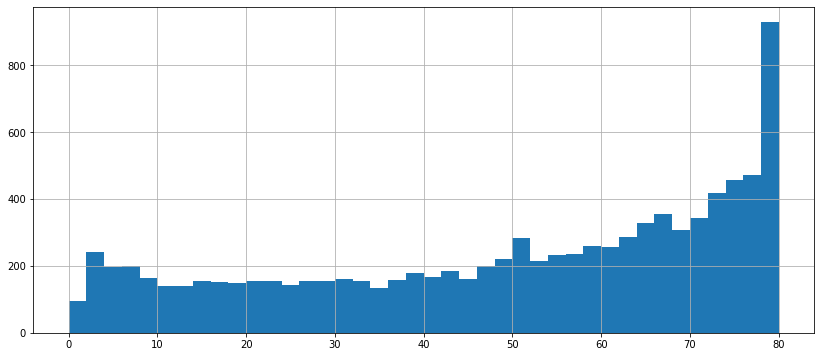

In [15]:
bin_values = np.arange(start=0, stop=82, step=2)
df_cleaned['gp'].hist(bins=bin_values, figsize=[14,6])

In [16]:
# 10 seems to be a good number to have as min because after that point data is normal

In [17]:
min_gp = 10
df_filter = df_cleaned[df_cleaned['gp'] > min_gp]

In [18]:
# lets check how many players were dropped due to the min gp requirement
x = df_cleaned['player_id'].count()
y = df_filter['player_id'].count()
print(x-y)

971


# Normalize data across all seasons 
# Important to do because due to playstyle, rule changes, player skill, etc stats are impacted by when they occurred

In [20]:
season = (df_filter['season_id'] == '2017-18')

In [21]:
df_2018 = df_filter[season]

In [22]:
df_2018.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
10073,201936,2017-18,52.0,28.0,30.9,7.0,15.6,0.452,2.2,5.5,...,3.2,4.0,0.785,0.8,4.3,5.2,2.3,1.1,0.3,19.4
10032,203933,2017-18,65.0,24.0,33.0,8.1,16.4,0.498,0.3,1.4,...,3.0,3.9,0.757,1.9,3.2,1.3,1.3,1.0,0.6,19.6
9707,203939,2017-18,79.0,26.0,21.2,3.2,5.4,0.593,0.4,1.1,...,1.7,2.3,0.719,1.7,3.9,1.2,0.7,0.8,0.4,8.5
9883,202498,2017-18,73.0,30.0,18.5,1.4,3.7,0.382,0.7,1.7,...,0.6,0.7,0.830,0.6,1.8,0.6,0.6,0.4,0.2,4.1
9999,201577,2017-18,64.0,30.0,26.4,5.3,10.1,0.530,0.1,0.2,...,1.1,1.4,0.756,2.1,2.4,1.9,1.7,0.2,0.8,11.8
9758,1627826,2017-18,43.0,21.0,9.5,1.4,2.8,0.500,0.0,0.0,...,0.9,1.2,0.765,1.0,1.8,0.6,0.6,0.2,0.3,3.7
9820,202322,2017-18,41.0,27.0,34.4,6.8,16.3,0.420,1.5,4.1,...,4.3,5.9,0.726,0.5,3.1,9.6,3.9,1.4,1.1,19.4
9682,1628372,2017-18,69.0,20.0,29.7,5.9,14.8,0.395,1.5,4.9,...,1.9,2.8,0.694,0.7,3.0,5.2,2.8,1.0,0.3,15.2
9903,1626259,2017-18,15.0,25.0,8.4,0.9,1.9,0.464,0.5,1.4,...,0.3,0.3,1.000,0.3,0.7,0.2,0.3,0.1,0.1,2.5
9792,201160,2017-18,33.0,32.0,8.6,1.4,3.5,0.391,0.1,1.0,...,0.6,0.6,0.905,0.5,1.1,0.4,0.5,0.1,0.4,3.4


In [23]:
# pts-min divided by max-min gives us a norm value for comparison across seasons
df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())

/var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/ipykernel_57998/2891695788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['pts_norm'] = (df_2018['pts'] - df_2018['pts'].min()) / (df_2018['pts'].max() - df_2018['pts'].min())


In [24]:
df_2018.sort_values('pts_norm', ascending=False).head(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts,pts_norm
9781,201935,2017-18,72.0,28.0,35.4,9.0,20.1,0.449,3.7,10.0,...,10.1,0.858,0.6,4.8,8.8,4.4,1.8,0.7,30.4,1.000000
9592,203076,2017-18,75.0,25.0,36.4,10.4,19.5,0.534,0.7,2.2,...,8.0,0.828,2.5,8.6,2.3,2.2,1.5,2.6,28.1,0.923077
9888,2544,2017-18,82.0,33.0,36.9,10.5,19.3,0.542,1.8,5.0,...,6.5,0.731,1.2,7.5,9.1,4.2,1.4,0.9,27.5,0.903010
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,7.4,0.916,0.8,3.6,6.6,2.8,1.1,0.4,26.9,0.882943
9737,203507,2017-18,75.0,23.0,36.7,9.9,18.7,0.529,0.6,1.9,...,8.5,0.760,2.1,8.0,4.8,3.0,1.5,1.4,26.9,0.882943
9863,201142,2017-18,68.0,29.0,34.2,9.3,18.0,0.516,2.5,6.1,...,5.9,0.889,0.5,6.4,5.4,3.0,0.7,1.8,26.4,0.866221
10028,201939,2017-18,51.0,30.0,32.0,8.4,16.9,0.495,4.2,9.8,...,5.9,0.921,0.7,4.4,6.1,3.0,1.6,0.2,26.4,0.866221
10008,201566,2017-18,80.0,29.0,36.4,9.5,21.1,0.449,1.2,4.1,...,7.1,0.737,1.9,8.2,10.3,4.8,1.8,0.3,25.4,0.832776
9676,202326,2017-18,48.0,27.0,36.2,8.5,18.0,0.470,2.2,6.1,...,8.2,0.746,2.2,10.7,5.4,5.0,1.6,1.6,25.2,0.826087
9690,1626164,2017-18,54.0,21.0,34.5,8.4,19.5,0.432,2.7,7.1,...,6.1,0.878,0.5,4.0,4.7,3.6,0.9,0.3,24.9,0.816054


In [25]:
# create function which takes col to normalize data to make it repeatable
# run function through a for loop going through each col and creating norm values

In [26]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

In [27]:
normalize(df_2018['fgm'])

9563     0.076923
9564     0.615385
9567     0.086538
9569     0.480769
9570     0.288462
           ...   
10098    0.153846
10099    0.538462
10100    0.576923
10101    0.201923
10102    0.019231
Name: fgm, Length: 463, dtype: float64

In [28]:
cols_to_norm = [
    'pts',
    'min',
    'fgm',
    'fga',
    'fg3m',
    'fg3a',
    'ftm',
    'fta',
    'oreb',
    'dreb',
    'ast',
    'stl',
    'tov',
    'blk'
]

In [29]:
def vorp(df):
    for col_name in cols_to_norm:
        df['{}_norm'.format(col_name)] = normalize(df[col_name])
    return df

In [30]:
df_2018_norm = vorp(df_2018)

/var/folders/6y/hkxs6t0j69gg890r8gtpf6br0000gn/T/ipykernel_57998/2513203259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['{}_norm'.format(col_name)] = normalize(df[col_name])


In [31]:
df_2018_norm.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
9753,1627819,2017-18,67.0,23.0,17.4,2.4,5.8,0.418,0.3,1.2,...,0.071429,0.12,0.172414,0.207921,0.058824,0.084112,0.300971,0.208333,0.26,0.038462
9650,203081,2017-18,73.0,27.0,36.6,8.5,19.4,0.439,3.1,8.6,...,0.738095,0.86,0.781609,0.732673,0.156863,0.317757,0.640777,0.458333,0.56,0.153846
9985,1626188,2017-18,33.0,25.0,22.4,3.7,7.6,0.484,1.4,3.2,...,0.333333,0.32,0.080460,0.079208,0.058824,0.186916,0.262136,0.166667,0.20,0.000000
9717,202339,2017-18,74.0,28.0,31.4,6.3,13.4,0.473,1.7,4.9,...,0.404762,0.49,0.390805,0.425743,0.137255,0.271028,0.485437,0.833333,0.58,0.230769
10005,1626220,2017-18,69.0,25.0,16.7,1.7,4.1,0.423,0.6,1.7,...,0.142857,0.17,0.103448,0.108911,0.078431,0.271028,0.135922,0.208333,0.16,0.076923
9644,1626245,2017-18,55.0,25.0,17.8,2.3,3.9,0.591,0.0,0.0,...,0.000000,0.00,0.114943,0.148515,0.294118,0.233645,0.097087,0.125000,0.20,0.076923
9713,203901,2017-18,63.0,24.0,28.7,5.2,10.6,0.493,0.5,1.5,...,0.119048,0.15,0.195402,0.267327,0.196078,0.289720,0.601942,0.541667,0.54,0.115385
9806,201573,2017-18,39.0,29.0,23.7,2.8,6.7,0.416,1.4,3.7,...,0.333333,0.37,0.103448,0.108911,0.078431,0.140187,0.135922,0.250000,0.24,0.076923
9892,101150,2017-18,79.0,31.0,32.8,7.4,16.9,0.435,2.4,6.6,...,0.571429,0.66,0.632184,0.613861,0.098039,0.168224,0.514563,0.458333,0.60,0.076923
9974,1626192,2017-18,82.0,25.0,18.1,2.0,4.8,0.423,0.9,2.6,...,0.214286,0.26,0.057471,0.049505,0.078431,0.121495,0.106796,0.125000,0.10,0.115385


In [33]:
grouped = df_filter.groupby('season_id')
grouped['pts'].mean()

season_id
1996-97    8.623559
1997-98    8.562944
1998-99    8.232000
1999-00    8.531250
2000-01    8.357071
2001-02    8.404444
2002-03    8.299244
2003-04    8.422727
2004-05    8.573934
2005-06    8.368925
2006-07    8.683962
2007-08    8.747837
2008-09    9.014425
2009-10    8.913494
2010-11    8.661283
2011-12    8.370670
2012-13    8.441109
2013-14    8.616173
2014-15    8.635398
2015-16    8.805923
2016-17    8.960586
2017-18    8.979266
2018-19    9.361472
Name: pts, dtype: float64

In [35]:
# normalize stats across all seasons

In [36]:
df_new = df_filter.groupby(['season_id']).apply(vorp)
df_new.sample(10)

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
5954,201592,2009-10,32.0,25.0,7.5,0.9,1.9,0.467,0.0,0.3,...,0.000000,0.042254,0.043478,0.068627,0.121951,0.094737,0.036364,0.130435,0.131579,0.035714
5371,1515,2008-09,80.0,34.0,33.0,4.0,9.4,0.426,1.2,3.0,...,0.428571,0.428571,0.166667,0.168224,0.139535,0.326316,0.309091,0.464286,0.342105,0.068966
9805,1626170,2017-18,74.0,25.0,22.8,2.8,6.8,0.416,0.8,2.5,...,0.190476,0.250000,0.218391,0.247525,0.078431,0.158879,0.446602,0.375000,0.240000,0.038462
5562,101181,2008-09,68.0,27.0,34.3,4.7,9.5,0.497,1.2,3.0,...,0.428571,0.428571,0.244444,0.214953,0.046512,0.242105,0.809091,0.392857,0.526316,0.034483
5017,101114,2007-08,82.0,24.0,37.3,6.9,13.6,0.507,1.0,2.6,...,0.333333,0.356164,0.487805,0.458716,0.097561,0.216981,0.905172,0.407407,0.772727,0.083333
9194,202324,2016-17,50.0,25.0,23.7,4.1,8.3,0.487,0.1,0.2,...,0.024390,0.020000,0.141304,0.201835,0.418605,0.405941,0.090090,0.450000,0.196429,0.307692
10147,202954,2018-19,36.0,29.0,9.5,1.4,2.9,0.476,0.4,1.1,...,0.078431,0.083333,0.072165,0.072727,0.018519,0.090909,0.149533,0.136364,0.100000,0.037037
7360,101127,2012-13,79.0,29.0,29.7,4.9,10.8,0.452,1.0,2.6,...,0.285714,0.337662,0.244186,0.245098,0.054545,0.254902,0.504505,0.333333,0.512821,0.033333
6029,201567,2009-10,60.0,21.0,28.6,4.9,10.8,0.450,0.6,1.8,...,0.240000,0.253521,0.413043,0.450980,0.926829,0.736842,0.209091,0.304348,0.526316,0.142857
6571,200794,2010-11,76.0,26.0,34.3,6.9,13.0,0.531,0.1,0.3,...,0.041667,0.047619,0.447368,0.376068,0.488889,0.500000,0.219298,0.583333,0.487179,0.346154


# Player Distance

In [38]:
# Find player distances to find most similar players

In [39]:
def calc_dist(u,v):
    dist = np.sqrt(np.sum((u - v)**2))
    return dist

In [40]:
# Test func

In [41]:
df1 = pd.read_csv('../nba-stats-csv/player_id_player_name.csv')

In [42]:
df2 = pd.read_csv('../nba-stats-csv/player_general_traditional_per_game_data.csv', usecols=['player_id', 'season_id', 'pts'])

In [43]:
df1.sample(5)

,player_id,player_name
357,202708,Norris Cole
298,202337,Luke Babbitt
256,203994,Jusuf Nurkic
446,1627789,Timothe Luwawu-Cabarrot
31,203462,Archie Goodwin


In [44]:
df2.sample(5)

,player_id,season_id,pts
9852,1628443,2017-18,1.1
2541,1594,2001-02,2.1
6626,202374,2010-11,0.5
694,708,1997-98,18.5
6125,1952,2009-10,11.8


In [45]:
# Merge df1 and df2
df3 = pd.merge(df1, df2, on='player_id', how='left')

In [46]:
df3.sample(5)

,player_id,player_name,season_id,pts
1112,201945,Gerald Henderson,2014-15,12.1
2084,201601,Luc Mbah a Moute,2009-10,6.2
1028,101141,Ersan Ilyasova,2015-16,10.4
2322,201563,Michael Beasley,2009-10,14.8
504,1626184,Chasson Randle,2018-19,5.5


In [47]:
df_2019 = df3[df3['season_id'] == '2018-19']

In [48]:
df_2019.sample(5)

,player_id,player_name,season_id,pts
1899,202691,Klay Thompson,2018-19,21.5
1269,200755,JJ Redick,2018-19,18.1
2233,202693,Markieff Morris,2018-19,9.4
2814,201577,Robin Lopez,2018-19,9.5
2583,1626192,Pat Connaughton,2018-19,6.9


In [49]:
# comparing specific players to test accuracy
dame_df = df_2019[df_2019['player_name'] == 'Damian Lillard']
stephen_df = df_2019[df_2019['player_name'] == 'Stephen Curry']
rudy_df = df_2019[df_2019['player_name'] == 'Rudy Gobert']

In [50]:
dame_ppg = dame_df.pts.tolist()[0]
stephen_ppg = stephen_df.pts.tolist()[0]
rudy_ppg = rudy_df.pts.tolist()[0]

In [51]:
calc_dist(dame_ppg, stephen_ppg)

1.5

In [52]:
calc_dist(stephen_ppg, dame_ppg)

1.5

In [53]:
calc_dist(dame_ppg, rudy_ppg)

9.9

# Find Player Function

In [54]:
df_example = df.sample(10)

In [55]:
df_example

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
6792,201599,2011-12,66.0,23.0,27.2,3.1,4.9,0.632,0.0,0.0,...,1.1,2.1,0.525,3.1,5.2,0.3,1.1,0.5,2.0,7.4
9483,1626257,2016-17,73.0,31.0,12.4,1.2,1.9,0.642,0.0,0.0,...,0.5,0.8,0.590,1.3,2.9,0.2,0.5,0.4,0.8,2.9
1811,735,2000-01,75.0,28.0,24.4,3.4,7.4,0.460,0.0,0.1,...,1.5,1.9,0.796,1.8,4.3,1.1,1.2,0.6,0.7,8.3
8667,2546,2015-16,72.0,32.0,35.1,7.9,18.2,0.434,1.5,4.3,...,4.6,5.6,0.829,1.4,6.4,4.2,2.4,0.9,0.5,21.8
8142,202620,2014-15,6.0,27.0,11.4,2.0,2.3,0.857,0.0,0.0,...,0.5,1.3,0.375,1.2,2.3,0.7,0.3,0.2,0.5,4.5
5026,2748,2007-08,44.0,22.0,25.1,3.3,6.7,0.488,0.1,0.3,...,1.3,1.6,0.826,1.1,3.9,1.4,0.7,0.7,0.9,7.9
6352,201565,2010-11,81.0,22.0,37.4,8.8,19.7,0.445,1.6,4.8,...,5.9,6.9,0.858,1.0,3.1,7.7,3.4,1.0,0.6,25.0
5341,201166,2008-09,80.0,24.0,25.0,4.0,9.8,0.404,1.4,3.9,...,1.9,2.2,0.866,0.4,1.6,3.0,1.6,0.6,0.1,11.2
2294,105,2001-02,65.0,36.0,18.2,1.5,4.4,0.343,1.2,3.6,...,0.4,0.6,0.590,0.4,2.3,1.4,0.5,0.7,0.2,4.6
5659,101126,2008-09,74.0,25.0,29.8,6.1,13.9,0.437,1.7,5.2,...,3.4,4.0,0.841,1.3,2.6,4.1,1.9,1.3,0.1,17.2


In [56]:
for row in df_example.itertuples():
    print(row.season_id, row.player_id)

2011-12 201599
2016-17 1626257
2000-01 735
2015-16 2546
2014-15 202620
2007-08 2748
2010-11 201565
2008-09 201166
2001-02 105
2008-09 101126


In [57]:
def find_player(player_id, player_season):
    for row in df_example.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [60]:
# test
find_player(105, '2001-02')

Pandas(Index=2294, player_id=105, season_id='2001-02', gp=65.0, age=36.0, min=18.2, fgm=1.5, fga=4.4, fg_pct=0.3429999999999999, fg3m=1.2, fg3a=3.6, fg3_pct=0.336, ftm=0.4, fta=0.6, ft_pct=0.59, oreb=0.4, dreb=2.3, ast=1.4, tov=0.5, stl=0.7, blk=0.2, pts=4.6)

In [61]:
find_player(105, '2022-23')

In [62]:
def find_player(df, player_id, player_season):
    for row in df.itertuples():
        if player_season == row.season_id and player_id == row.player_id:
            return row

In [63]:
df.dtypes

player_id      int64
season_id     object
gp           float64
age          float64
min          float64
fgm          float64
fga          float64
fg_pct       float64
fg3m         float64
fg3a         float64
fg3_pct      float64
ftm          float64
fta          float64
ft_pct       float64
oreb         float64
dreb         float64
ast          float64
tov          float64
stl          float64
blk          float64
pts          float64
dtype: object

In [64]:
find_player(df, 2544, '2012-13')

Pandas(Index=7454, player_id=2544, season_id='2012-13', gp=76.0, age=28.0, min=37.9, fgm=10.1, fga=17.8, fg_pct=0.565, fg3m=1.4, fg3a=3.3, fg3_pct=0.406, ftm=5.3, fta=7.0, ft_pct=0.753, oreb=1.3, dreb=6.8, ast=7.3, tov=3.0, stl=1.7, blk=0.9, pts=26.8)

In [65]:
# Next we calculate player similarity

In [66]:
# test with jrue holiday from 2016-17
current_player_season = '2016-17'
current_player_id = 201950

In [67]:
df_norm

NameError: name 'df_norm' is not defined

In [68]:
df_filter

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,ftm,fta,ft_pct,oreb,dreb,ast,tov,stl,blk,pts
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,1.0,1.2,0.875,0.7,1.8,1.4,0.8,0.2,0.3,3.4
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,1.5,2.4,0.650,2.7,5.2,0.8,0.9,0.8,0.2,7.2
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,1.1,1.3,0.836,0.5,2.2,1.9,1.1,0.9,0.3,5.2
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,1.0,1.5,0.673,1.9,2.5,0.5,1.0,0.5,0.9,6.2
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,1.1,1.8,0.643,0.7,1.3,0.4,0.7,0.3,0.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.8,0.9,0.896,0.2,1.4,1.9,0.6,0.5,0.1,5.9
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.5,0.7,0.700,0.3,1.8,0.5,0.4,0.3,0.1,2.6
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,1.2,1.6,0.746,1.4,2.8,0.9,1.0,0.3,0.9,6.6
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,5.0,6.0,0.832,0.6,4.0,4.5,3.4,1.0,0.4,23.7


In [69]:
df_norm = df_filter.groupby(['season_id']).apply(vorp)

In [70]:
df_norm

,player_id,season_id,gp,age,min,fgm,fga,fg_pct,fg3m,fg3a,...,fg3m_norm,fg3a_norm,ftm_norm,fta_norm,oreb_norm,dreb_norm,ast_norm,stl_norm,tov_norm,blk_norm
0,471,1996-97,41.0,NaN,13.3,1.1,3.3,0.331,0.2,0.7,...,0.071429,0.090909,0.156250,0.127660,0.118644,0.160000,0.122807,0.074074,0.181818,0.088235
1,920,1996-97,83.0,33.0,30.8,2.8,5.8,0.483,0.0,0.2,...,0.000000,0.025974,0.234375,0.255319,0.457627,0.500000,0.070175,0.296296,0.204545,0.058824
2,243,1996-97,83.0,24.0,20.4,1.8,4.4,0.411,0.5,1.2,...,0.178571,0.155844,0.171875,0.138298,0.084746,0.200000,0.166667,0.333333,0.250000,0.088235
3,1425,1996-97,33.0,25.0,17.8,2.6,4.5,0.574,0.0,0.0,...,0.000000,0.000000,0.156250,0.159574,0.322034,0.230000,0.043860,0.185185,0.227273,0.264706
4,768,1996-97,47.0,27.0,11.1,1.4,3.8,0.374,0.0,0.1,...,0.000000,0.012987,0.171875,0.191489,0.118644,0.110000,0.035088,0.111111,0.159091,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,1627812,2018-19,71.0,25.0,15.0,2.2,5.0,0.435,0.8,2.1,...,0.156863,0.159091,0.082474,0.081818,0.037037,0.118182,0.177570,0.227273,0.120000,0.037037
10626,1629139,2018-19,15.0,24.0,11.6,1.0,3.4,0.294,0.1,1.1,...,0.019608,0.083333,0.051546,0.063636,0.055556,0.154545,0.046729,0.136364,0.080000,0.037037
10627,1628380,2018-19,77.0,21.0,17.6,2.5,5.2,0.473,0.5,1.6,...,0.098039,0.121212,0.123711,0.145455,0.259259,0.245455,0.084112,0.136364,0.200000,0.333333
10628,203897,2018-19,63.0,24.0,34.5,8.4,18.0,0.467,1.9,5.1,...,0.372549,0.386364,0.515464,0.545455,0.111111,0.354545,0.420561,0.454545,0.680000,0.148148


In [71]:
jrue_pts_norm = (df_norm.loc[(df_norm['player_id'] == current_player_id) 
                & (df_norm['season_id'] == current_player_season),
                'pts_norm']).item()

In [72]:
jrue_pts_norm

0.474025974025974